In [ ]:
#pip install plotly

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px



#df = pd.read_csv("ANSO PATH/clean_data.csv", sep=',', header=0)

df = pd.read_csv("/Users/leakrivaa/downloads/DataMining-main-4/Analysis/clean_data.csv", sep=',', header=0)

#df = pd.read_csv("TOSTI PATH /clean_data.csv", sep=',', header=0)



In [3]:
df

,index,date,year,manner_of_death,armed,armed_encoded,age,gender,race,city,state,state_ID,signs_of_mental_illness,threat_level,threatLevel_encoded,flee,flee_encoded,body_camera
0,0,2015-01-02,2015,0,gun,1,53,1,0,Shelton,WA,47,True,attack,1,Not fleeing,0,False
1,1,2015-01-02,2015,0,gun,1,47,1,5,Aloha,OR,37,False,attack,1,Not fleeing,0,False
2,2,2015-01-03,2015,1,unarmed,0,23,1,2,Wichita,KS,16,False,other,0,Not fleeing,0,False
3,3,2015-01-04,2015,0,toy weapon,0,32,1,5,San Francisco,CA,4,True,attack,1,Not fleeing,0,False
4,4,2015-01-04,2015,0,nail gun,1,39,1,2,Evans,CO,5,False,attack,1,Not fleeing,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,5615,2020-09-04,2020,0,gun,1,33,1,1,Syracuse,NY,34,False,other,0,Not fleeing,0,True
5028,5616,2020-09-04,2020,0,gun,1,38,1,5,Lucerne,CA,4,False,attack,1,Not fleeing,0,False
5029,5617,2020-09-05,2020,0,vehicle,1,22,1,5,Battle Creek,MI,22,False,attack,1,Car,1,False
5030,5618,2020-09-05,2020,0,knife,1,61,1,1,San Antonio,TX,43,False,attack,1,Not fleeing,0,False


In [4]:
predictionDF = pd.DataFrame(df, columns=['year', 'manner_of_death'])

predictionDF

,year,manner_of_death
0,2015,0
1,2015,0
2,2015,1
3,2015,0
4,2015,0
...,...,...
5027,2020,0
5028,2020,0
5029,2020,0
5030,2020,0


In [5]:
death_year = predictionDF.groupby([predictionDF['year']]).agg({'count'})
death_year

,manner_of_death
,count
year,
2015,965
2016,906
2017,908
2018,889
2019,857
2020,507


In [6]:
shot_per_year = pd.DataFrame([(2015, 965),(2016, 906),(2017,908),(2018,889),(2019,857),(2020,507)], 
                             columns=('year', 'killed_count'))

shot_per_year

,year,killed_count
0,2015,965
1,2016,906
2,2017,908
3,2018,889
4,2019,857
5,2020,507


In [24]:
"""
Division of shot over the years
x = years
y = killed

"""

import plotly.graph_objects as go

x = shot_per_year['year']
y = shot_per_year['killed_count']

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
            
        )])

fig.update_layout(
    title_text='Shootings a year')

fig.show()

In [ ]:
"""
Old version of killed distributed over the years
"""

# Create a sample dataframe with an text index
#death_per_year = death_year.plot.bar(rot=0)
x = shot_per_year['year']
y = shot_per_year['killed_count']


plt.bar(x,y, color='royalblue')
    
plt.title('Shootings over the years', fontsize=18, color='black')
plt.xlabel('Years', fontsize=13, color='black')
plt.ylabel('Shot', fontsize=13, color='black')


    
plt.show()

predictionDF_new = death_year.reset_index()
predictionDF_new

In [8]:
death_count = pd.DataFrame([('2015', 965),
                   ('2016', 906),
                   ('2017', 908),
                   ('2018', 889),
                   ('2019', 857),
                   ('2020', 507)],
           columns=('year', 'death_count')
                 )


death_count


,year,death_count
0,2015,965
1,2016,906
2,2017,908
3,2018,889
4,2019,857
5,2020,507


In [13]:
#Extracting the data to be used for this bar chart
extra = pd.DataFrame(df, columns=['year', 'race'])
extra

,year,race
0,2015,0
1,2015,5
2,2015,2
3,2015,5
4,2015,2
...,...,...
5027,2020,1
5028,2020,5
5029,2020,5
5030,2020,1


In [14]:
#Functions to calculate how many from each race are killed each year. 

def year2015(extra):
    year2015A = 0
    year2015B = 0
    year2015H = 0
    year2015N = 0
    year2015O = 0
    year2015W = 0
    
    for index in extra.index:
        if extra.loc[index, 'year'] == 2015 and extra.loc[index, 'race'] == 0:
            year2015A += 1
        elif extra.loc[index, 'year'] == 2015 and extra.loc[index, 'race'] == 1:
            year2015B += 1
        elif extra.loc[index, 'year'] == 2015 and extra.loc[index, 'race'] == 2:
            year2015H += 1
        elif extra.loc[index, 'year'] == 2015 and extra.loc[index, 'race'] == 3:
            year2015N += 1
        elif extra.loc[index, 'year'] == 2015 and extra.loc[index, 'race'] == 4:
            year2015O += 1
        elif extra.loc[index, 'year'] == 2015 and extra.loc[index, 'race'] == 5:
            year2015W += 1

    print('Year 2015 race A: ' + str(year2015A))
    print('Year 2015 race B: ' + str(year2015B))
    print('Year 2015 race H: ' + str(year2015H))
    print('Year 2015 race N: ' + str(year2015N))
    print('Year 2015 race O: ' + str(year2015O))
    print('Year 2015 race W: ' + str(year2015W))
            
year2015(extra)

print()

def year2016(extra):
    year2016A = 0
    year2016B = 0
    year2016H = 0
    year2016N = 0
    year2016O = 0
    year2016W = 0
    
    for index in extra.index:
        if extra.loc[index, 'year'] == 2016 and extra.loc[index, 'race'] == 0:
            year2016A += 1
        elif extra.loc[index, 'year'] == 2016 and extra.loc[index, 'race'] == 1:
            year2016B += 1
        elif extra.loc[index, 'year'] == 2016 and extra.loc[index, 'race'] == 2:
            year2016H += 1
        elif extra.loc[index, 'year'] == 2016 and extra.loc[index, 'race'] == 3:
            year2016N += 1
        elif extra.loc[index, 'year'] == 2016 and extra.loc[index, 'race'] == 4:
            year2016O += 1
        elif extra.loc[index, 'year'] == 2016 and extra.loc[index, 'race'] == 5:
            year2016W += 1

    print('Year 2016 race A: ' + str(year2016A))
    print('Year 2016 race B: ' + str(year2016B))
    print('Year 2016 race H: ' + str(year2016H))
    print('Year 2016 race N: ' + str(year2016N))
    print('Year 2016 race O: ' + str(year2016O))
    print('Year 2016 race W: ' + str(year2016W))

year2016(extra)
print()

def year2017(extra):
    year2017A = 0
    year2017B = 0
    year2017H = 0
    year2017N = 0
    year2017O = 0
    year2017W = 0
    
    for index in extra.index:
        if extra.loc[index, 'year'] == 2017 and extra.loc[index, 'race'] == 0:
            year2017A += 1
        elif extra.loc[index, 'year'] == 2017 and extra.loc[index, 'race'] == 1:
            year2017B += 1
        elif extra.loc[index, 'year'] == 2017 and extra.loc[index, 'race'] == 2:
            year2017H += 1
        elif extra.loc[index, 'year'] == 2017 and extra.loc[index, 'race'] == 3:
            year2017N += 1
        elif extra.loc[index, 'year'] == 2017 and extra.loc[index, 'race'] == 4:
            year2017O += 1
        elif extra.loc[index, 'year'] == 2017 and extra.loc[index, 'race'] == 5:
            year2017W += 1

    print('Year 2017 race A: ' + str(year2017A))
    print('Year 2017 race B: ' + str(year2017B))
    print('Year 2017 race H: ' + str(year2017H))
    print('Year 2017 race N: ' + str(year2017N))
    print('Year 2017 race O: ' + str(year2017O))
    print('Year 2017 race W: ' + str(year2017W))

year2017(extra)
print()

def year2018(extra):
    year2018A = 0
    year2018B = 0
    year2018H = 0
    year2018N = 0
    year2018O = 0
    year2018W = 0
    
    for index in extra.index:
        if extra.loc[index, 'year'] == 2018 and extra.loc[index, 'race'] == 0:
            year2018A += 1
        elif extra.loc[index, 'year'] == 2018 and extra.loc[index, 'race'] == 1:
            year2018B += 1
        elif extra.loc[index, 'year'] == 2018 and extra.loc[index, 'race'] == 2:
            year2018H += 1
        elif extra.loc[index, 'year'] == 2018 and extra.loc[index, 'race'] == 3:
            year2018N += 1
        elif extra.loc[index, 'year'] == 2018 and extra.loc[index, 'race'] == 4:
            year2018O += 1
        elif extra.loc[index, 'year'] == 2018 and extra.loc[index, 'race'] == 5:
            year2018W += 1

    print('Year 2018 race A: ' + str(year2018A))
    print('Year 2018 race B: ' + str(year2018B))
    print('Year 2018 race H: ' + str(year2018H))
    print('Year 2018 race N: ' + str(year2018N))
    print('Year 2018 race O: ' + str(year2018O))
    print('Year 2018 race W: ' + str(year2018W))

year2018(extra)
print()

def year2019(extra):
    year2019A = 0
    year2019B = 0
    year2019H = 0
    year2019N = 0
    year2019O = 0
    year2019W = 0
    
    for index in extra.index:
        if extra.loc[index, 'year'] == 2019 and extra.loc[index, 'race'] == 0:
            year2019A += 1
        elif extra.loc[index, 'year'] == 2019 and extra.loc[index, 'race'] == 1:
            year2019B += 1
        elif extra.loc[index, 'year'] == 2019 and extra.loc[index, 'race'] == 2:
            year2019H += 1
        elif extra.loc[index, 'year'] == 2019 and extra.loc[index, 'race'] == 3:
            year2019N += 1
        elif extra.loc[index, 'year'] == 2019 and extra.loc[index, 'race'] == 4:
            year2019O += 1
        elif extra.loc[index, 'year'] == 2019 and extra.loc[index, 'race'] == 5:
            year2019W += 1

    print('Year 2019 race A: ' + str(year2019A))
    print('Year 2019 race B: ' + str(year2019B))
    print('Year 2019 race H: ' + str(year2019H))
    print('Year 2019 race N: ' + str(year2019N))
    print('Year 2019 race O: ' + str(year2019O))
    print('Year 2019 race W: ' + str(year2019W))

year2019(extra)
print()

def year2020(extra):
    year2020A = 0
    year2020B = 0
    year2020H = 0
    year2020N = 0
    year2020O = 0
    year2020W = 0
    
    for index in extra.index:
        if extra.loc[index, 'year'] == 2020 and extra.loc[index, 'race'] == 0:
            year2020A += 1
        elif extra.loc[index, 'year'] == 2020 and extra.loc[index, 'race'] == 1:
            year2020B += 1
        elif extra.loc[index, 'year'] == 2020 and extra.loc[index, 'race'] == 2:
            year2020H += 1
        elif extra.loc[index, 'year'] == 2020 and extra.loc[index, 'race'] == 3:
            year2020N += 1
        elif extra.loc[index, 'year'] == 2020 and extra.loc[index, 'race'] == 4:
            year2020O += 1
        elif extra.loc[index, 'year'] == 2020 and extra.loc[index, 'race'] == 5:
            year2020W += 1

    print('Year 2020 race A: ' + str(year2020A))
    print('Year 2020 race B: ' + str(year2020B))
    print('Year 2020 race H: ' + str(year2020H))
    print('Year 2020 race N: ' + str(year2020N))
    print('Year 2020 race O: ' + str(year2020O))
    print('Year 2020 race W: ' + str(year2020W))

year2020(extra)

Year 2015 race A: 14
Year 2015 race B: 258
Year 2015 race H: 172
Year 2015 race N: 9
Year 2015 race O: 14
Year 2015 race W: 498

Year 2016 race A: 15
Year 2016 race B: 234
Year 2016 race H: 160
Year 2016 race N: 16
Year 2016 race O: 11
Year 2016 race W: 470

Year 2017 race A: 16
Year 2017 race B: 224
Year 2017 race H: 180
Year 2017 race N: 22
Year 2017 race O: 6
Year 2017 race W: 460

Year 2018 race A: 20
Year 2018 race B: 229
Year 2018 race H: 165
Year 2018 race N: 15
Year 2018 race O: 4
Year 2018 race W: 456

Year 2019 race A: 19
Year 2019 race B: 250
Year 2019 race H: 163
Year 2019 race N: 13
Year 2019 race O: 9
Year 2019 race W: 403

Year 2020 race A: 9
Year 2020 race B: 134
Year 2020 race H: 90
Year 2020 race N: 4
Year 2020 race O: 3
Year 2020 race W: 267


In [15]:
#Creating a dataframe for the data calculated above
stackedBar = pd.DataFrame([(2015, 0, 14),
                   (2015, 1, 258),
                   (2015,2, 172),
                   (2015,3, 9),
                   (2015, 4, 14),
                   (2015, 5, 498),
                   (2016, 0, 15),
                   (2016, 1, 234),
                   (2016, 2, 160), 
                   (2016, 3, 16),
                   (2016, 4, 11),
                   (2016, 5, 470),
                   (2017, 0, 16),
                   (2017, 1, 224),
                   (2017, 2, 180),
                   (2017, 3, 22),
                   (2017, 4, 6),
                   (2017, 5, 460),
                   (2018, 0, 20),
                   (2018, 1, 229),
                   (2018, 2, 165),
                   (2018, 3, 15),
                   (2018, 4, 4),
                   (2018, 5, 456),
                   (2019, 0, 19),
                   (2019, 1, 250),
                   (2019, 2, 163),
                   (2019, 3, 13),
                   (2019, 4, 9),
                   (2019, 5, 403),
                   (2020, 0, 9),
                   (2020, 1, 134),
                   (2020, 2, 90),
                   (2020,3,4),
                   (2020, 4, 3),
                   (2020,5,267)
                          ],
           columns=('year','race', 'death_count')
                 )

In [16]:
#View new dataframe with the values calculated.
stackedBar

,year,race,death_count
0,2015,0,14
1,2015,1,258
2,2015,2,172
3,2015,3,9
4,2015,4,14
5,2015,5,498
6,2016,0,15
7,2016,1,234
8,2016,2,160
9,2016,3,16


In [17]:
#Tried to group based on race, is not used
grouped_df = stackedBar.groupby(["race"])

for key,item in grouped_df:
    a_group = grouped_df.get_group(key)
    
    print(a_group, "\n")

    year  race  death_count
0   2015     0           14
6   2016     0           15
12  2017     0           16
18  2018     0           20
24  2019     0           19
30  2020     0            9 

    year  race  death_count
1   2015     1          258
7   2016     1          234
13  2017     1          224
19  2018     1          229
25  2019     1          250
31  2020     1          134 

    year  race  death_count
2   2015     2          172
8   2016     2          160
14  2017     2          180
20  2018     2          165
26  2019     2          163
32  2020     2           90 

    year  race  death_count
3   2015     3            9
9   2016     3           16
15  2017     3           22
21  2018     3           15
27  2019     3           13
33  2020     3            4 

    year  race  death_count
4   2015     4           14
10  2016     4           11
16  2017     4            6
22  2018     4            4
28  2019     4            9
34  2020     4            3 

    year  

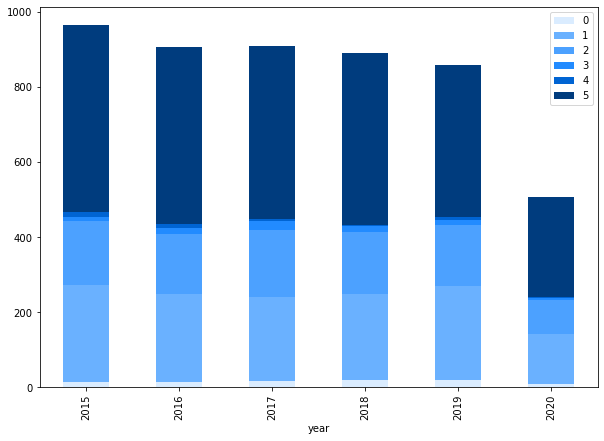

In [18]:
#First bar chart created, should no be used. 
fig, ax = plt.subplots(figsize=(10,7))  

races = stackedBar['race'].drop_duplicates()
margin_bottom = np.zeros(len(stackedBar['year'].drop_duplicates()))
colors = [['#DAECFF'],['#6AB1FF'],['#4CA1FF'], 
       ['#228BFF'],['#0064D3'],['#003C7E']]
raceList = ["A", "B", "H", "N", "O", "W"]
num = 5

for num, race in enumerate(races):
    values = list(stackedBar[stackedBar['race'] == race].loc[:, 'death_count'])
    
    stackedBar[stackedBar['race'] == race].plot.bar(x='year',y='death_count', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=race)
    margin_bottom += values

plt.show()

In [19]:
#stacked bar chart to gain an overview of killings of each race a year. 

import plotly.graph_objects as go
years=['2015', '2016', '2017','2018','2019','2020']

fig = go.Figure(data=[
    go.Bar(name='Asian', x=years, y=[14, 15, 16,20,19,9]),
    go.Bar(name='Black', x=years, y=[258, 234, 224, 229,250,134]),
    go.Bar(name='Hispanic', x=years, y=[172,160,180,165,163,90]),
    go.Bar(name='Native American', x=years, y =[9,16,22,15,13,4]),
    go.Bar(name='Other', x=years, y=[14,11,6,4,9,3]),
    go.Bar(name='White', x=years, y=[498,470,460,456,403,267])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
death_race

In [ ]:
newDF = pd.DataFrame([(0, 93),
                   (1, 1329),
                   (2, 930),
                   (3, 79),
                   (4, 47),
                   (5, 2554)],
           columns=('race', 'race_count')
                 )

In [ ]:
#Showing number of each race killed
raceDeath = newDF['race_count'].plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
raceDeath.set_title("Death count of specific races", fontsize=18)
raceDeath.set_xlabel("Deaths", fontsize=18);
raceDeath.set_ylabel("count")
#a.set_xticks([0, 5, 10, 15, 20])



# invert for largest on top 
raceDeath

